# Introduction to uproot

The interface is minimal: open a file with `uproot.open` and extract objects with a dictionary-like interface. Let's open a NanoAOD file.

In [1]:
import uproot
tree = uproot.open("~/storage/data/nano-TTLHE-2017-09-04-lz4.root")["Events"]
tree

<TTree 'Events' len=55432 at 0x7b48d3df6950>

Incidentally, the one-liner above is not possible with PyROOT because ROOT's and Python's notions of object ownership conflict.

In [2]:
import ROOT
tree2 = ROOT.TFile("/home/pivarski/storage/data/nano-TTLHE-2017-09-04-lz4.root").Get("Events")
tree2

Welcome to JupyROOT 6.08/04


<ROOT.TTree object at 0x(nil)>

As with most Python modules, all of the class members and methods that don't start with underscore are public.

In [3]:
print(", ".join(x for x in dir(tree) if not x.startswith("_")))

Counter, allbranches, allbranchnames, allbranchtypes, array, arrays, arrowed, branch, branches, branchnames, branchtypes, classes, counter, iterator, lazyarray, lazyarrays, leaves, name, numentries, pandas, title


In [4]:
help(tree.array)

Help on method array in module uproot.tree:

array(self, branch, dtype=None, executor=None, block=True) method of uproot.tree.TTree instance
    Extracts a whole branch into a Numpy array.
    
    Individual branches from TTrees are typically small enough to fit into memory. If this is not your case, consider `tree.iterator(entries)` to load a given number of entries at a time.
    
    Arguments:
    
        * `branch` *(required)*
    
           Branch name to extract.
    
        * `dtype`
    
           If not `None`, cast the array into a given `dtype` (such as conversion to little endian).
           If an array object, fill that array instead of creating a new one (shape must match).
    
        * `executor` (same as in `TTree.arrays`)
    
          A `concurrent.futures.Executor` that would be used to parallelize the basket loading/decompression.
          If `None`, the process is serial.
    
        * `block`
    
          If `True` and parallel processing with an `e

In [5]:
tree.branchnames

['run',
 'luminosityBlock',
 'event',
 'nElectron',
 'Electron_deltaEtaSC',
 'Electron_dxy',
 'Electron_eta',
 'Electron_mass',
 'Electron_mvaSpring16GP',
 'Electron_mvaSpring16HZZ',
 'Electron_phi',
 'Electron_pt',
 'Electron_pterr',
 'Electron_r9',
 'Electron_sieie',
 'Electron_sip3d',
 'Electron_charge',
 'Electron_cutBased',
 'Electron_cutBased_HLTPreSel',
 'Electron_jet',
 'Electron_mvaSpring16GP_WP80',
 'Electron_mvaSpring16GP_WP90',
 'Electron_mvaSpring16HZZ_WPL',
 'Electron_pdgId',
 'nFatJet',
 'FatJet_area',
 'FatJet_btagCMVA',
 'FatJet_btagDeepB',
 'FatJet_btagDeepBB',
 'FatJet_eta',
 'FatJet_mass',
 'FatJet_mpruned',
 'FatJet_msoftdrop',
 'FatJet_phi',
 'FatJet_pt',
 'FatJet_tau1',
 'FatJet_tau2',
 'FatJet_tau3',
 'FatJet_subJet1',
 'FatJet_subJet2',
 'FatJet_subJet3',
 'nGenJet',
 'GenJet_eta',
 'GenJet_mass',
 'GenJet_phi',
 'GenJet_pt',
 'nGenPart',
 'GenPart_eta',
 'GenPart_phi',
 'GenPart_pt',
 'GenPart_mother',
 'GenPart_pdgId',
 'GenPart_status',
 'genWeight',
 'LHEWe

In [7]:
len(tree.array("Electron_pt"))

61788

In [8]:
tree.arrays(["Electron_pt", "Electron_eta", "Electron_phi"])

{'Electron_eta': array([-0.50317383, -0.22283936,  0.3380127 , ...,  0.16601562,
        -1.51855469,  2.38574219], dtype=float32),
 'Electron_phi': array([-1.97704196,  2.73374438, -2.23343873, ..., -1.10651565,
         1.69811368,  2.38514328], dtype=float32),
 'Electron_pt': array([ 21.26379776,   5.12322283,  14.14859962, ...,  16.72582626,
         18.65698242,  15.28109741], dtype=float32)}

The branch/dtype argument of methods like `arrays` can take a function from `TBranch` to `dtype/None` as an argument, providing a flexible way to select branches and possibly change their Numpy `dtype` on the fly.

In [9]:
tree.arrays(lambda branch: branch.dtype if branch.name.startswith("Electron_") else None)

{'Electron_charge': array([-1, -1,  1, ..., -1, -1,  1], dtype=int32),
 'Electron_cleanmask': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
 'Electron_cutBased': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Electron_cutBased_HLTPreSel': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Electron_deltaEtaSC': array([ 0.00846107,  0.00699943,  0.0149112 , ...,  0.01897203,
         0.00869478,  0.02348849], dtype=float32),
 'Electron_dxy': array([-0.38358903, -0.00145535,  0.00341794, ..., -0.00323985,
         0.00780344,  0.01845314], dtype=float32),
 'Electron_eta': array([-0.50317383, -0.22283936,  0.3380127 , ...,  0.16601562,
        -1.51855469,  2.38574219], dtype=float32),
 'Electron_jet': array([3, 0, 1, ..., 4, 0, 3], dtype=int32),
 'Electron_mass': array([-0.00792694,  0.00127983,  0.00332069, ...,  0.00569153,
         0.01219177,  0.00673294], dtype=float32),
 'Electron_mvaSpring16GP': array([-0.99991018, -0.9973309 , -0.7685014 , ..., -0.99344712,
        -0.64150786, -0.9586

For instance, we can change all numbers from the "big endian" format ROOT stores them in to your machine's native byte order.

In [10]:
tree.arrays(lambda branch: branch.dtype.newbyteorder("=") if branch.name.startswith("Electron_") else None)

{'Electron_charge': array([-1, -1,  1, ..., -1, -1,  1], dtype=int32),
 'Electron_cleanmask': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
 'Electron_cutBased': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Electron_cutBased_HLTPreSel': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Electron_deltaEtaSC': array([ 0.00846107,  0.00699943,  0.0149112 , ...,  0.01897203,
         0.00869478,  0.02348849], dtype=float32),
 'Electron_dxy': array([-0.38358903, -0.00145535,  0.00341794, ..., -0.00323985,
         0.00780344,  0.01845314], dtype=float32),
 'Electron_eta': array([-0.50317383, -0.22283936,  0.3380127 , ...,  0.16601562,
        -1.51855469,  2.38574219], dtype=float32),
 'Electron_jet': array([3, 0, 1, ..., 4, 0, 3], dtype=int32),
 'Electron_mass': array([-0.00792694,  0.00127983,  0.00332069, ...,  0.00569153,
         0.01219177,  0.00673294], dtype=float32),
 'Electron_mvaSpring16GP': array([-0.99991018, -0.9973309 , -0.7685014 , ..., -0.99344712,
        -0.64150786, -0.9586

If you already have an array, you can pass it in place of the `dtype` argument. This avoids unnecessary copies.

In [11]:
import numpy
electron_pt = numpy.zeros(tree.array("nElectron").sum(), dtype=numpy.float64)
id(electron_pt)

135552227028704

In [12]:
electron_pt

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [13]:
tree.array("Electron_pt", electron_pt)
id(electron_pt)

135552227028704

In [14]:
electron_pt

array([ 21.26379776,   5.12322283,  14.14859962, ...,  16.72582626,
        18.65698242,  15.28109741])

If the arrays are too large to read all at once, you can iterate over them.

In [20]:
for pt, eta, phi in tree.iterator(1000, ["Electron_pt", "Electron_eta", "Electron_phi"], outputtype=tuple):
    print("px = {}".format(pt.shape))

Or over a collection of files (like TChain).

In [21]:
for pt, eta, phi in uproot.iterator(1000, "~/storage/data/nano-TTLHE-2017-09-04-*.root", "Events", ["Electron_pt", "Electron_eta", "Electron_phi"], outputtype=tuple):
    print("px = {}".format(pt*numpy.cosh(eta)*numpy.sin(phi)))

uproot uses Python's `Executor` interface for parallelism. Parallel processing and caching are never implicit: you have to give it an object.

In [ ]:
import concurrent.futures
four_workers = concurrent.futures.ThreadPoolExecutor(4)

tree.arrays(["Electron_pt", "Electron_eta", "Electron_phi"], executor=four_workers)

In [ ]:
# returns immediately, before actually reading
arrays, errors = tree.arrays(["Electron_pt", "Electron_eta", "Electron_phi"],
                                                             executor=four_workers, block=False)

In [ ]:
# evaluate this iterator to wait for arrays to be filled and see if there were any errors
list(errors)

I'm adding connectors to other libraries, but I need your input about which are the most important.

In [22]:
df = tree.pandas.df(lambda branch: branch.dtype if branch.name.startswith("Electron_") else None)
df

,Electron_deltaEtaSC,Electron_dxy,Electron_eta,Electron_mass,Electron_mvaSpring16GP,Electron_mvaSpring16HZZ,Electron_phi,Electron_pt,Electron_pterr,Electron_r9,...,Electron_sip3d,Electron_charge,Electron_cutBased,Electron_cutBased_HLTPreSel,Electron_jet,Electron_mvaSpring16GP_WP80,Electron_mvaSpring16GP_WP90,Electron_mvaSpring16HZZ_WPL,Electron_pdgId,Electron_cleanmask
0,0.008461,-0.383589,-0.503174,-0.007927,-0.999910,-0.999899,-1.977042,21.263798,1.817561,0.338915,...,4.357436,-1,0,0,3,0,0,0,11,1
1,0.006999,-0.001455,-0.222839,0.001280,-0.997331,-0.994908,2.733744,5.123223,0.463325,0.473331,...,0.696418,-1,0,0,0,0,0,0,11,1
2,0.014911,0.003418,0.338013,0.003321,-0.768501,-0.980286,-2.233439,14.148600,2.060835,0.945313,...,10.729231,1,0,0,1,0,0,0,-11,1
3,0.007591,0.002976,2.422363,-0.008163,-0.658143,-0.974859,0.471326,11.940388,8.339510,0.740251,...,2.641892,-1,0,0,2,0,0,0,11,1
4,-0.038997,-0.000002,0.124268,-0.005939,0.986377,0.988415,-1.084366,30.055460,3.590917,0.960271,...,0.649395,-1,4,1,2,1,1,1,11,1
5,-0.031107,-0.006901,-1.384521,0.002663,-0.995392,-0.994702,-2.705423,14.741048,1.695331,0.537597,...,1.396386,1,0,0,0,0,0,0,-11,1
6,-0.034951,0.001633,-0.541992,0.004280,-0.527973,-0.942798,2.559478,12.253747,1.371960,0.968543,...,1.309832,-1,0,0,1,0,0,0,11,1
7,0.014235,-0.001128,-1.192627,-0.011436,-0.998805,-0.991167,1.698805,43.358791,6.897726,0.737704,...,4.500576,1,0,0,1,0,0,0,-11,1
8,-0.003861,-0.001881,-1.731201,0.006336,-0.998021,-0.994047,0.543655,9.491758,1.486895,0.722713,...,826.929260,-1,0,0,-1,0,0,0,11,1
9,0.001918,-0.003880,-1.718262,0.004139,-0.996643,-0.997861,-2.547211,6.401640,1.005923,0.609341,...,295.567108,-1,0,0,-1,0,0,0,11,1


Now you can do that whole Pandas-analysis thing. See StackOverflow for help.

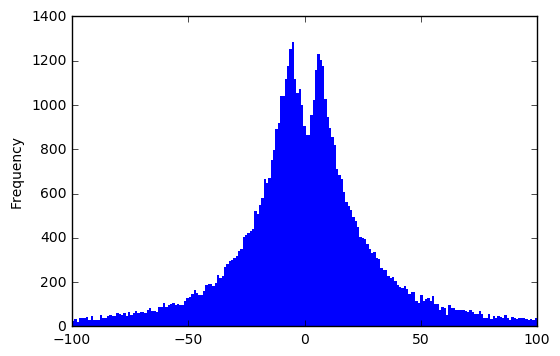

In [23]:
%matplotlib inline

px = (df.Electron_pt * numpy.cosh(df.Electron_eta) * numpy.sin(df.Electron_phi))

px.plot.hist(numpy.linspace(-100, 100, 200), edgecolor="none")

## Next steps

By now, you've probably noticed that we're limited to in-memory analytics and flat ntuples.

For a Pandas interface on a large set of files (out-of-memory analytics; what you've come to expect from ROOT's `TChain`), it could be interesting to try Blaze. Ask me about it if you're interested.

<table>
<tr style="background: white"><td><center><img src="http://blaze.pydata.org/images/blaze.png" width="200"></center></td></tr>
<tr><td style="font-size: 18pt">Blaze <a href="http://blaze.pydata.org/">blaze.pydata.org</a></td></tr>
</table>

For non-flat data (nested classes), let's move on to the next notebook.